<a href="https://colab.research.google.com/github/aysenurcftc/ML_preprocessing/blob/main/outliers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#TRIM: Ayrkiri degerleri belirledikten sonra veri setinden basitçe kaldırmaktır.
#WINSORIZE: Her bir aykiri degeri en yakin normal degerlerle degistirmektir.
#RECODE: Aykiri degerler belirlendikten sonra onlari kaldirip, bos deger gibi dusunulup imputation islemleri yapilabillir.

In [2]:
# To get multi output in jupyternotebook
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# sklearn ciktisini nnumpy array olarak donmektedir. Bu adimi pandas icin ayarlayabiliriz.
from sklearn import set_config
set_config(transform_output="pandas")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split

In [3]:
data=pd.read_csv('water_potability.csv')
data.head(3)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0


In [4]:
data_cleaned = data.dropna()

In [5]:
x = data_cleaned.drop('Potability', axis=1)
y = data_cleaned['Potability']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [6]:
from sklearn.neighbors import LocalOutlierFactor

outlier_LOF = LocalOutlierFactor(n_neighbors=5)
outlier_LOF.fit_predict(X_train)

array([1, 1, 1, ..., 1, 1, 1])

In [7]:
from sklearn.neighbors import LocalOutlierFactor
outlier_LOF = LocalOutlierFactor(n_neighbors=5)

outlier_LOF_index= np.where(outlier_LOF.fit_predict(X_train)==-1)
X_train_non_LOF = X_train[outlier_LOF.fit_predict(X_train) == 1]

In [8]:
outlier_LOF_index

(array([  18,  213,  232,  303,  402,  412,  413,  427,  548,  603,  644,
         782,  958, 1096, 1120, 1377, 1401]),)

In [9]:
outlier_LOF.negative_outlier_factor_[0]

-0.9836817785286989

Text(0.5, 0, 'Aykırı Değer Sayısı: 12')

Text(0.5, 1.0, 'LOF')

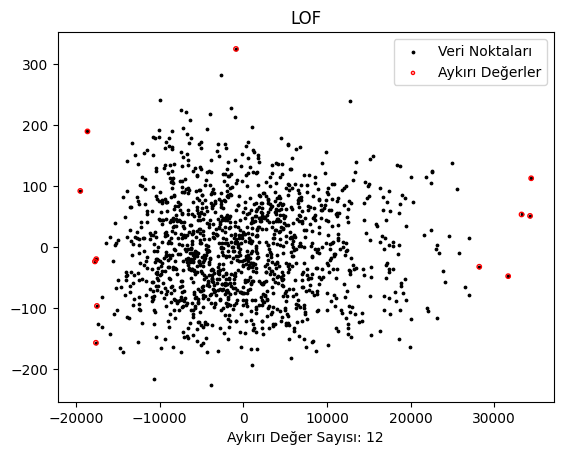

In [10]:
from sklearn.decomposition import PCA
from sklearn.neighbors import LocalOutlierFactor
reduction=PCA(n_components=2)
X_train_pca=reduction.fit_transform(X_train)


outlier_LOF = LocalOutlierFactor()
outlier_LOF_index = outlier_LOF.fit_predict(X_train)

plt.scatter(X_train_pca.iloc[:, 0], X_train_pca.iloc[:, 1], color="k", s=3.0, label="Veri Noktaları")
plt.scatter(X_train_pca.iloc[:, 0], X_train_pca.iloc[:, 1], s=10*(outlier_LOF_index == -1), edgecolors="r", facecolors="none", label="Aykırı Değerler")
plt.xlabel(f"Aykırı Değer Sayısı: {np.sum(outlier_LOF_index == -1)}")
plt.legend()
plt.title("LOF")
plt.show()

Text(0.5, 0, 'Aykırı Değer Sayısı: 105')

Text(0.5, 1.0, 'Isolation Forest')

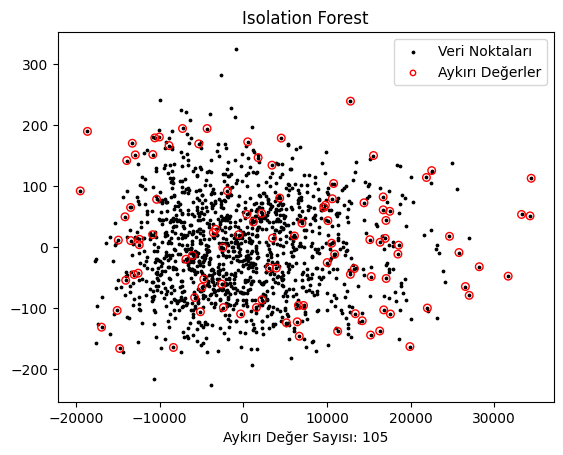

In [11]:
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest
reduction = PCA(n_components=2)
X_train_pca=reduction.fit_transform(X_train)


outlier_ISO = IsolationForest(contamination='auto')
outlier_ISO_index = outlier_ISO.fit_predict(X_train)

plt.scatter(X_train_pca.iloc[:, 0], X_train_pca.iloc[:, 1], color="k", s=3.0, label="Veri Noktaları")
plt.scatter(X_train_pca.iloc[:, 0], X_train_pca.iloc[:, 1], s=30*(outlier_ISO_index == -1), edgecolors="r", facecolors="none", label="Aykırı Değerler")
plt.xlabel(f"Aykırı Değer Sayısı: {np.sum(outlier_ISO_index == -1)}")
plt.legend()
plt.title("Isolation Forest")
plt.show()

In [12]:
from sklearn.ensemble import IsolationForest
outlier_ISO = IsolationForest(random_state = 0)

outlier_ISO_index = np.where(outlier_ISO.fit_predict(X_train)==-1)
X_train_non_ISO = X_train[outlier_ISO.fit_predict(X_train) == 1]

In [13]:
ortak_outlier_index = np.intersect1d(outlier_LOF_index, outlier_ISO_index)
ortak_outlier_index

array([], dtype=int64)

In [14]:
!pip install feature_engine

In [23]:
#Özellikle veri noktalarının yoğunluğuna dayalı olarak anormallık tespiti yapmak istediğinizde bu yöntem kullanışlıdır.
from feature_engine.outliers import Winsorizer
Solids = Winsorizer(capping_method='gaussian', tail='both', variables=['Solids'])

Solids.fit(X_train)
X_train_solids=Solids.transform(X_train)

Winsorizer(tail='both', variables=['Solids'])

In [24]:
print(f"Ust Sinirlar {Solids.right_tail_caps_} \n Alt Sinirlar {Solids.left_tail_caps_}")

Ust Sinirlar {'Solids': 47766.861546273416} 
 Alt Sinirlar {'Solids': -3647.472016981843}


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: >

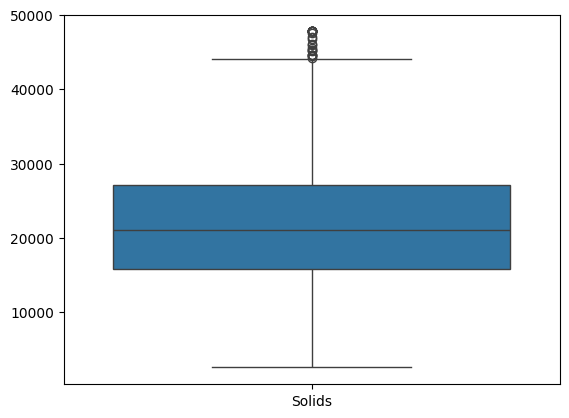

In [25]:
sns.boxplot(X_train_solids[['Solids']])